In [1]:
import pandas as pd

In [21]:
data = pd.read_csv(r'D:\DATA SCIENCE\Data Analysis Projects\01. GDAPC\Case Study 1.1 Cyclistics Restarted\00. Data for Viz\v8_data_for_visualization.csv')

In [22]:
df = pd.DataFrame(data)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678066 entries, 0 to 3678065
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_duration       object 
 1   ride_id             object 
 2   rideable_type       object 
 3   member_casual       object 
 4   weekday             int64  
 5   started_at          object 
 6   ended_at            object 
 7   start_station_name  object 
 8   start_station_id    object 
 9   end_station_name    object 
 10  end_station_id      object 
 11  start_lat           float64
 12  start_lng           float64
 13  end_lat             float64
 14  end_lng             float64
 15  month               int64  
 16  quarter             int64  
 17  ride_distance_km    float64
 18  ride_hour           int64  
 19  time_bucket         object 
 20  minutes_below_3     bool   
dtypes: bool(1), float64(5), int64(4), object(11)
memory usage: 564.7+ MB


In [ ]:
#df.to_csv(r'D:\DATA SCIENCE\Data Analysis Projects\01. GDAPC\Case Study 1.1 Cyclistics Restarted\00. Data for Viz\v8_data_for_visualization.csv',sep=',', index=False)

In [4]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_duration'] = pd.to_timedelta(df['ride_duration'])

In [18]:
df.columns

Index(['ride_duration', 'ride_id', 'rideable_type', 'member_casual', 'weekday',
       'started_at', 'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'month', 'quarter', 'ride_distance_km',
       'ride_hour', 'time_bucket', 'minutes_below_3'],
      dtype='object')

---
---
## Cyclistic Ride Analysis: Member vs. Casual Ride Counts  


In [5]:
df.groupby('member_casual')["member_casual"].value_counts().reset_index(name="Rides_Counts")

,member_casual,Rides_Counts
0,casual,1360656
1,member,2317410


---
---
# **Time Base Analysis**

---
---
## Cyclistic Ride Analysis by Rideable Type and Membership  

In [6]:
df.groupby('rideable_type')["member_casual"].value_counts().reset_index(name="Rides_Counts")

,rideable_type,member_casual,Rides_Counts
0,classic_bike,member,1527420
1,classic_bike,casual,878768
2,electric_bike,member,771711
3,electric_bike,casual,460006
4,electric_scooter,casual,21882
5,electric_scooter,member,18279


---
---
## Cyclistic Ride Analysis: Quarterly Trends  


In [7]:
df.groupby('quarter')["member_casual"].value_counts().reset_index(name="Rides_Counts")

,quarter,member_casual,Rides_Counts
0,1,member,344456
1,1,casual,103809
2,2,member,661773
3,2,casual,420621
4,3,member,824736
5,3,casual,609223
6,4,member,486445
7,4,casual,227003


---
---
## Cyclistic Ride Analysis by Month and Membership Type  


In [8]:
df.groupby('month')["member_casual"].value_counts().reset_index(name="Rides_Counts").sort_values(by='month')

,month,member_casual,Rides_Counts
0,1,member,78980
1,1,casual,15052
2,2,member,124194
3,2,casual,33413
4,3,member,141282
5,3,casual,55344
6,4,member,172871
7,4,casual,82847
8,5,member,236887
9,5,casual,149378


---
---
## Cyclistic Ride Analysis by Weekday and Membership Type  


In [9]:
df.groupby('weekday')["member_casual"].value_counts().reset_index(name="Rides_Counts")

,weekday,member_casual,Rides_Counts
0,1,member,342644
1,1,casual,162048
2,2,member,361438
3,2,casual,144501
4,3,member,384083
5,3,casual,166843
6,4,member,355758
7,4,casual,162951
8,5,member,324526
9,5,casual,198440


---
---
## Analysis of Ride Counts by Time Buckets (Casual vs. Member Riders)


In [10]:
df.groupby(['time_bucket', 'member_casual']).size().reset_index(name='ride_counts')

,time_bucket,member_casual,ride_counts
0,12AM-6AM,casual,54633
1,12AM-6AM,member,60204
2,12PM-3PM,casual,293868
3,12PM-3PM,member,381533
4,3PM-6PM,casual,366896
5,3PM-6PM,member,635137
6,6AM-9AM,casual,98865
7,6AM-9AM,member,367246
8,6PM-9PM,casual,243239
9,6PM-9PM,member,415636


---
---
# **Location Based Analysis**

---
---
## Cyclistic Ride Analysis: Most Frequented Routes  


In [11]:
df.groupby(["start_station_name", "end_station_name"])["member_casual"].value_counts().reset_index(name="Rides_Counts").sort_values(by= 'Rides_Counts', ascending=False).head(10)

,start_station_name,end_station_name,member_casual,Rides_Counts
216386,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,casual,7308
78870,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,casual,6081
79296,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,casual,5265
209080,State St & 33rd St,Calumet Ave & 33rd St,member,4264
153329,Michigan Ave & Oak St,Michigan Ave & Oak St,casual,4024
84089,Ellis Ave & 60th St,Ellis Ave & 55th St,member,3799
83684,Ellis Ave & 55th St,Ellis Ave & 60th St,member,3731
29007,Calumet Ave & 33rd St,State St & 33rd St,member,3652
219807,University Ave & 57th St,Ellis Ave & 60th St,member,3426
84193,Ellis Ave & 60th St,University Ave & 57th St,member,3312


---
---
## Cyclistic Ride Analysis: Top 10 Start Stations  


In [12]:
df.groupby('start_station_name')["member_casual"].value_counts().reset_index(name="Rides_Counts").sort_values(by= 'Rides_Counts', ascending=False).head(10)

,start_station_name,member_casual,Rides_Counts
2351,Streeter Dr & Grand Ave,casual,45446
683,DuSable Lake Shore Dr & Monroe St,casual,30438
1234,Kingsbury St & Kinzie St,member,23548
534,Clinton St & Washington Blvd,member,22844
1659,Michigan Ave & Oak St,casual,22294
685,DuSable Lake Shore Dr & North Blvd,casual,20457
488,Clark St & Elm St,member,20278
526,Clinton St & Madison St,member,19906
1673,Millennium Park,casual,19396
2180,Shedd Aquarium,casual,18866


---
---
## By Latitue and Longitude

member_casual
casual    2.198037
member    2.225210
Name: ride_distance_km, dtype: float64


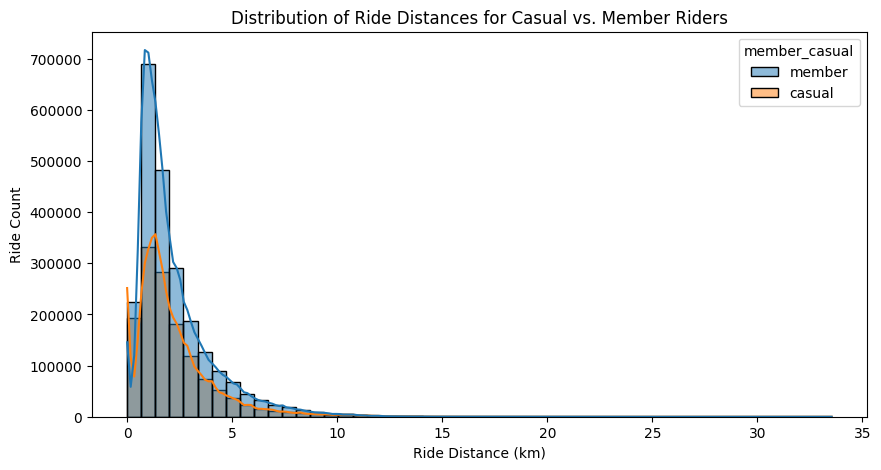

In [13]:
import numpy as np

# Haversine formula to calculate distance in km
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distance for each ride
df['ride_distance_km'] = haversine(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Average distance per user type
avg_distance = df.groupby('member_casual')['ride_distance_km'].mean()
print(avg_distance)

# Visualization (Histogram)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='ride_distance_km', hue='member_casual', bins=50, kde=True)
plt.title('Distribution of Ride Distances for Casual vs. Member Riders')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Ride Count')
plt.show()


In [16]:
df['ride_distance_km'].max()

np.float64(33.53885075179023)

---
---
# Extras

## Analysis of Ride Abandonment (Rides Below 3 Minutes)


In [14]:
df.groupby(['minutes_below_3', 'member_casual']).size().reset_index(name='ride_counts')

,minutes_below_3,member_casual,ride_counts
0,False,casual,1358060
1,False,member,2306943
2,True,casual,2596
3,True,member,10467
